# Deep Learning Playground

This notebook demonstrates:
1. **MLP** for tabular data
2. **CNN** for image data
3. **Simple RNN**, **LSTM**, and **GRU** for sequence data

Feel free to adjust hyper‑parameters and architectures to deepen your understanding!

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models , optimizers
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.18.0


## Part 1 – MLP on Titanic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\corex\AppData\Local\Temp\ipykernel_17060\1715040388.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [ ]:
mlp = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp.summary()


C:\Users\corex\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

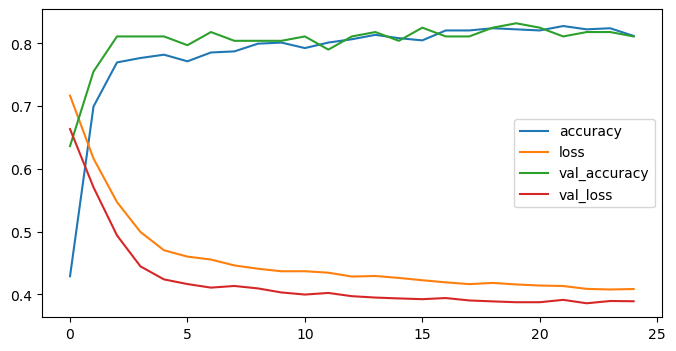

Test accuracy: 0.832402229309082


In [ ]:
hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.2, verbose=0)
pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

## Part 2 – CNN on MNIST

In [ ]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
X_train_m = X_train_m.astype('float32')/255.
X_test_m = X_test_m.astype('float32')/255.
X_train_m = X_train_m[...,None]
X_test_m = X_test_m[...,None]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

C:\Users\corex\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.fit(X_train_m, y_train_m, epochs=10, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/10
422/422 - 23s - 54ms/step - accuracy: 0.9764 - loss: 0.0771 - val_accuracy: 0.9880 - val_loss: 0.0457
Epoch 2/10
422/422 - 22s - 53ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 3/10
422/422 - 23s - 54ms/step - accuracy: 0.9896 - loss: 0.0332 - val_accuracy: 0.9898 - val_loss: 0.0381
Epoch 4/10
422/422 - 23s - 53ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9892 - val_loss: 0.0399
Epoch 5/10
422/422 - 21s - 50ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9900 - val_loss: 0.0406
Epoch 6/10
422/422 - 24s - 56ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9912 - val_loss: 0.0358
Epoch 7/10
422/422 - 22s - 51ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9903 - val_loss: 0.0380
Epoch 8/10
422/422 - 23s - 55ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9912 - val_loss: 0.0380
Epoch 9/10
422/422 - 23s - 55ms/step - accuracy: 0.9972 - loss: 0.0082 - val_accuracy: 0.9890 - 

## Part 3 – RNNs for Time Series

In [ ]:
t = np.linspace(0, 100, 10000)
series = np.sin(t)
window=50
X_seq, y_seq = [], []
for i in range(len(series)-window):
    X_seq.append(series[i:i+window])
    y_seq.append(series[i+window])
X_seq, y_seq = np.array(X_seq)[...,None], np.array(y_seq)
split=int(0.8*len(X_seq))
X_train_s, X_test_s = X_seq[:split], X_seq[split:]
y_train_s, y_test_s = y_seq[:split], y_seq[split:]
print(X_train_s.shape)

(7960, 50, 1)


### Simple RNN

In [ ]:
rnn = models.Sequential([layers.SimpleRNN(64, input_shape=(window,1)),
                        layers.Dense(1)])
rnn.compile(optimizer='adam', loss='mse')
rnn.summary()
rnn.fit(X_train_s, y_train_s, epochs=10, batch_size=128, validation_split=0.1, verbose=2)
print('RNN Test MSE:', rnn.evaluate(X_test_s, y_test_s, verbose=0))

C:\Users\corex\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
56/56 - 3s - 58ms/step - loss: 0.0060 - val_loss: 1.5120e-04
Epoch 2/10
56/56 - 1s - 15ms/step - loss: 8.1606e-05 - val_loss: 3.7035e-05
Epoch 3/10
56/56 - 1s - 14ms/step - loss: 3.1931e-05 - val_loss: 2.1283e-05
Epoch 4/10
56/56 - 1s - 16ms/step - loss: 1.9700e-05 - val_loss: 1.6059e-05
Epoch 5/10
56/56 - 1s - 19ms/step - loss: 1.3833e-05 - val_loss: 1.3135e-05
Epoch 6/10
56/56 - 1s - 20ms/step - loss: 9.8318e-06 - val_loss: 7.4476e-06
Epoch 7/10
56/56 - 1s - 20ms/step - loss: 7.4627e-06 - val_loss: 5.7466e-06
Epoch 8/10
56/56 - 1s - 18ms/step - loss: 5.1072e-06 - val_loss: 4.0412e-06
Epoch 9/10
56/56 - 1s - 18ms/step - loss: 3.9823e-06 - val_loss: 2.9695e-06
Epoch 10/10
56/56 - 1s - 20ms/step - loss: 3.1331e-06 - val_loss: 2.5274e-06
RNN Test MSE: 2.9583702598756645e-06


### LSTM

In [ ]:
lstm = models.Sequential([layers.LSTM(64, input_shape=(window,1)),
                         layers.Dense(1)])
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()
lstm.fit(X_train_s, y_train_s, epochs=10, batch_size=128, validation_split=0.1, verbose=2)
print('LSTM Test MSE:', lstm.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
56/56 - 5s - 94ms/step - loss: 0.0439 - val_loss: 0.0020
Epoch 2/10
56/56 - 3s - 52ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/10
56/56 - 3s - 53ms/step - loss: 9.1309e-04 - val_loss: 5.1283e-04
Epoch 4/10
56/56 - 3s - 55ms/step - loss: 1.9136e-04 - val_loss: 1.8751e-05
Epoch 5/10
56/56 - 3s - 47ms/step - loss: 9.9784e-06 - val_loss: 7.7531e-06
Epoch 6/10
56/56 - 3s - 52ms/step - loss: 6.0172e-06 - val_loss: 4.6896e-06
Epoch 7/10
56/56 - 3s - 53ms/step - loss: 3.6661e-06 - val_loss: 2.6366e-06
Epoch 8/10
56/56 - 3s - 47ms/step - loss: 2.1430e-06 - val_loss: 1.6768e-06
Epoch 9/10
56/56 - 3s - 49ms/step - loss: 1.2526e-06 - val_loss: 9.3998e-07
Epoch 10/10
56/56 - 3s - 50ms/step - loss: 7.8514e-07 - val_loss: 5.3183e-07
LSTM Test MSE: 5.29439546426147e-07


### GRU

In [ ]:
gru = models.Sequential([layers.GRU(128, input_shape=(window,1)),
                        layers.Dense(1)])
gru.compile(optimizer='adam', loss='mse')
gru.summary()
gru.fit(X_train_s, y_train_s, epochs=10, batch_size=128, validation_split=0.1, verbose=2)
print('GRU Test MSE:', gru.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
56/56 - 9s - 163ms/step - loss: 0.0478 - val_loss: 7.0931e-04
Epoch 2/10
56/56 - 6s - 105ms/step - loss: 4.7286e-04 - val_loss: 3.9751e-04
Epoch 3/10
56/56 - 6s - 100ms/step - loss: 3.8069e-04 - val_loss: 3.5557e-04
Epoch 4/10
56/56 - 6s - 113ms/step - loss: 3.4051e-04 - val_loss: 3.0605e-04
Epoch 5/10
56/56 - 6s - 116ms/step - loss: 3.0104e-04 - val_loss: 3.1937e-04
Epoch 6/10
56/56 - 7s - 121ms/step - loss: 2.7378e-04 - val_loss: 2.4304e-04
Epoch 7/10
56/56 - 7s - 119ms/step - loss: 2.3674e-04 - val_loss: 2.1139e-04
Epoch 8/10
56/56 - 7s - 120ms/step - loss: 2.0146e-04 - val_loss: 1.8039e-04
Epoch 9/10
56/56 - 7s - 121ms/step - loss: 1.6837e-04 - val_loss: 1.5427e-04
Epoch 10/10
56/56 - 7s - 121ms/step - loss: 1.3002e-04 - val_loss: 1.1399e-04
GRU Test MSE: 0.00010908214608207345


## Visualizing MNIST Data

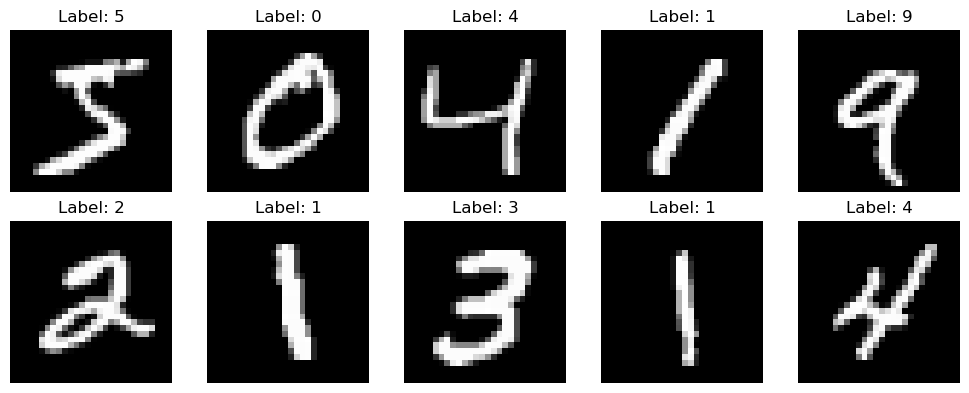

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
(X_train, y_train), (_, _) = mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Exercises

#### 1. Change the Activation Function
Try using `tanh`, `sigmoid`, or `leaky_relu` instead of `relu`. How does it affect training?

#### 2. Add Dropout
Add `Dropout(0.3)` after dense or convolutional layers. Does it help reduce overfitting?

#### 3. Train a CNN on a New Image Dataset
Choose a public dataset: **CIFAR-10**,  and train a CNN model. You can load it using Keras:
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### 4. Train an LSTM for Text Processing
Choose a small text dataset (e.g., IMDB movie reviews from Keras).
👉 Tokenize the data, pad the sequences, and use an `Embedding` + `LSTM` model to classify text.

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
```
👉 Build and train a sequential model using `Embedding` + `LSTM` + `Dense`.

---
 *Tip:* For each dataset, remember to normalize inputs, convert labels to one-hot encoding if needed, and evaluate accuracy and loss.


### Try using tanh

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(64,(3,3),activation='tanh',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='tanh'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='tanh'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.fit(X_train_m, y_train_m, epochs=10, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/10
422/422 - 26s - 62ms/step - accuracy: 0.9484 - loss: 0.1796 - val_accuracy: 0.9830 - val_loss: 0.0589
Epoch 2/10
422/422 - 25s - 60ms/step - accuracy: 0.9858 - loss: 0.0486 - val_accuracy: 0.9870 - val_loss: 0.0474
Epoch 3/10
422/422 - 23s - 55ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9892 - val_loss: 0.0405
Epoch 4/10
422/422 - 26s - 62ms/step - accuracy: 0.9941 - loss: 0.0208 - val_accuracy: 0.9897 - val_loss: 0.0401
Epoch 5/10
422/422 - 24s - 56ms/step - accuracy: 0.9961 - loss: 0.0141 - val_accuracy: 0.9902 - val_loss: 0.0410
Epoch 6/10
422/422 - 23s - 55ms/step - accuracy: 0.9971 - loss: 0.0110 - val_accuracy: 0.9907 - val_loss: 0.0382
Epoch 7/10
422/422 - 24s - 56ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9892 - val_loss: 0.0415
Epoch 8/10
422/422 - 23s - 54ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 0.9893 - val_loss: 0.0423
Epoch 9/10
422/422 - 22s - 53ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9883 - 

### Add Dropout(0.3)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3), 
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3), 
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.fit(X_train_m, y_train_m, epochs=10, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/10
422/422 - 26s - 61ms/step - accuracy: 0.9211 - loss: 0.2560 - val_accuracy: 0.9810 - val_loss: 0.0627
Epoch 2/10
422/422 - 25s - 59ms/step - accuracy: 0.9759 - loss: 0.0765 - val_accuracy: 0.9870 - val_loss: 0.0446
Epoch 3/10
422/422 - 26s - 61ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9898 - val_loss: 0.0360
Epoch 4/10
422/422 - 24s - 57ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9895 - val_loss: 0.0344
Epoch 5/10
422/422 - 26s - 63ms/step - accuracy: 0.9881 - loss: 0.0366 - val_accuracy: 0.9903 - val_loss: 0.0322
Epoch 6/10
422/422 - 23s - 56ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9907 - val_loss: 0.0340
Epoch 7/10
422/422 - 25s - 59ms/step - accuracy: 0.9900 - loss: 0.0292 - val_accuracy: 0.9908 - val_loss: 0.0317
Epoch 8/10
422/422 - 24s - 58ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9928 - val_loss: 0.0251
Epoch 9/10
422/422 - 24s - 57ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9925 - 

### 3_ Train CNN on CIFAR 10

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# 2. Adapte le modèle à CIFAR‑10 (32×32×3)
cnn = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()

# 3. Entraînement
history = cnn.fit(
    X_train, y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=2
)

# 4. Évaluation
loss, acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc*100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,050 (1.28 MB)

 Trainable params: 335,050 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
782/782 - 17s - 22ms/step - accuracy: 0.4350 - loss: 1.5662 - val_accuracy: 0.5456 - val_loss: 1.2899
Epoch 2/20
782/782 - 18s - 22ms/step - accuracy: 0.5684 - loss: 1.2209 - val_accuracy: 0.6226 - val_loss: 1.0961
Epoch 3/20
782/782 - 21s - 27ms/step - accuracy: 0.6172 - loss: 1.0870 - val_accuracy: 0.6301 - val_loss: 1.0572
Epoch 4/20
782/782 - 22s - 29ms/step - accuracy: 0.6450 - loss: 1.0107 - val_accuracy: 0.6432 - val_loss: 1.0086
Epoch 5/20
782/782 - 22s - 29ms/step - accuracy: 0.6706 - loss: 0.9438 - val_accuracy: 0.6942 - val_loss: 0.8897
Epoch 6/20
782/782 - 23s - 29ms/step - accuracy: 0.6882 - loss: 0.8880 - val_accuracy: 0.6960 - val_loss: 0.8828
Epoch 7/20
782/782 - 23s - 29ms/step - accuracy: 0.7053 - loss: 0.8427 - val_accuracy: 0.7010 - val_loss: 0.8695
Epoch 8/20
782/782 - 23s - 29ms/step - accuracy: 0.7211 - loss: 0.8012 - val_accuracy: 0.7169 - val_loss: 0.8261
Epoch 9/20
782/782 - 24s - 31ms/step - accuracy: 0.7282 - loss: 0.7711 - val_accuracy: 0.7213 - 

### 4. Train an LSTM for Text Processing

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Chargement des données (top 10 000 mots)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Padding des séquences à longueur 100
X_train = pad_sequences(X_train, maxlen=100)
X_test  = pad_sequences(X_test,  maxlen=100)

# Construction du modèle : Embedding + LSTM + Dense
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Entraînement
model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

# Évaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc*100:.2f}%")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\corex\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 - 49s - 63ms/step - accuracy: 0.7980 - loss: 0.4272 - val_accuracy: 0.8516 - val_loss: 0.3404
Epoch 2/5
782/782 - 53s - 68ms/step - accuracy: 0.8931 - loss: 0.2678 - val_accuracy: 0.8214 - val_loss: 0.4643
Epoch 3/5
782/782 - 51s - 66ms/step - accuracy: 0.9265 - loss: 0.1914 - val_accuracy: 0.8502 - val_loss: 0.4261
Epoch 4/5
782/782 - 52s - 67ms/step - accuracy: 0.9542 - loss: 0.1280 - val_accuracy: 0.8182 - val_loss: 0.4718
Epoch 5/5
782/782 - 51s - 65ms/step - accuracy: 0.9680 - loss: 0.0920 - val_accuracy: 0.8353 - val_loss: 0.5055
Test accuracy: 83.53%
